In [2]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy.testing
import numpy as np
import numpy.testing
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras import utils,losses,layers,Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,TensorBoard


In [3]:
data_path="D:\jena_climate_2009_2016.csv"
dataset=pd.read_csv(data_path,parse_dates=['Date Time'],index_col=['Date Time'])

dataset.shape#输出数组形状(420551, 14)（行，列）
dataset.tail()#输出尾5个列
dataset.head()#数据结构如下，输出头5个列
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420551 entries, 2009-01-01 00:10:00 to 2017-01-01 00:00:00
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p (mbar)         420551 non-null  float64
 1   T (degC)         420551 non-null  float64
 2   Tpot (K)         420551 non-null  float64
 3   Tdew (degC)      420551 non-null  float64
 4   rh (%)           420551 non-null  float64
 5   VPmax (mbar)     420551 non-null  float64
 6   VPact (mbar)     420551 non-null  float64
 7   VPdef (mbar)     420551 non-null  float64
 8   sh (g/kg)        420551 non-null  float64
 9   H2OC (mmol/mol)  420551 non-null  float64
 10  rho (g/m**3)     420551 non-null  float64
 11  wv (m/s)         420551 non-null  float64
 12  max. wv (m/s)    420551 non-null  float64
 13  wd (deg)         420551 non-null  float64
dtypes: float64(14)
memory usage: 48.1 MB


In [4]:
dataset.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
#肉眼观察法————下面三块可以不要
plt.figure(figsize=(16,8))
#作图辅助库
sns.lineplot(x='p (mbar)',y='T (degC)',data=dataset[:10000])
plt.show()

plt.figure(figsize=(16,8))
sns.lineplot(x='Tdew (degC)',y='T (degC)',data=dataset[:10000])
plt.show()

plt.figure(figsize=(16,8))
sns.lineplot(x='max. wv (m/s)',y='T (degC)',data=dataset[:50000])
plt.show()
#以上是看T (degC)和p (mbar)、Tdew (degC)的关系


In [5]:
#给dataset插入新列，列为Data Time列的相应时间值
dataset['year']=dataset.index.year
dataset['hour']=dataset.index.hour
dataset['month']=dataset.index.month

dataset.head()


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),year,hour,month
Date Time,,,,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3,2009,0,1
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1,2009,0,1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6,2009,0,1
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0,2009,0,1
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3,2009,0,1


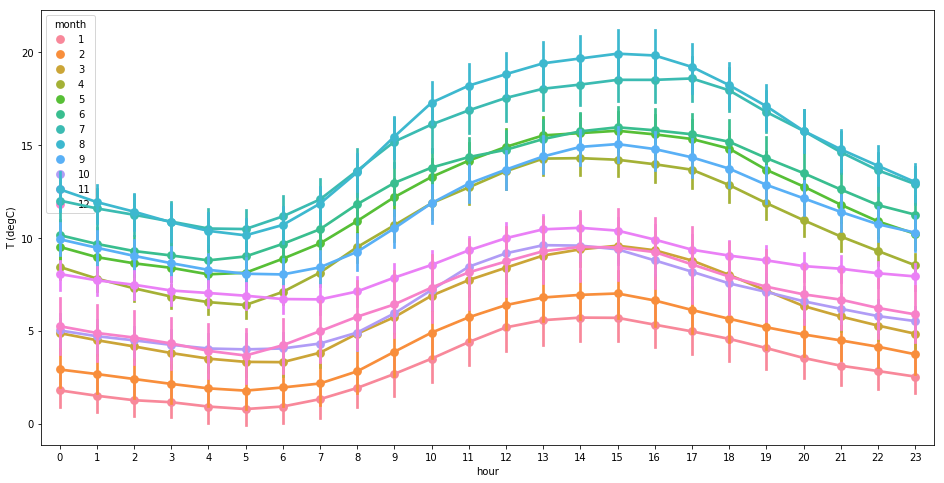

In [6]:
#时间与温度的关系图
plt.figure(figsize=(16,8))
sns.pointplot(x='hour',y='T (degC)',data=dataset[0:50000],hue='month')
plt.show()


In [7]:
#由于温度与每日的小时变化有关系，而且0-23作为一个循环，所以用三角函数提取周期信息，sin和cos同时使用是因为确保24小时为一个周期——用就完了（建议参考相关资料）
dataset['sin(h)']=[np.sin((x) * (2 * np.pi / 24)) for x in dataset['hour']]
dataset['cos(h)']=[np.cos((x) * (2 * np.pi / 24)) for x in dataset['hour']]


In [8]:
#future=['sin(h)','cos(h)','month','max. wv (m/s)','p (mbar)','T (degC)']
#定义切分函数，x是选取的特征组成的例表，y是标签列（x=dataset[future=] ，y=dataset['T (degC)']）
#train_dataset,train_labels=multivariate_data(x_train,y_train,0,100000,3,1,1,True)
#上面的一个使用的意思就是：从0开始数到10万，按照3条x数据作为一个元素放入data-》1条y数据作为一个元素存入labels，step=1表示每一条数据就按照上面包装一次，比如data[0]=x[0，1，2]->labels[0]=y[3];data[1]=x[1,2,3]->labels[1]=y[4];
#single_step意思是只预测目标的一个未来状态，只预测后1小时，设置为false可以预测未来0到target_size小时内的温度。
def multivariate_data(x,y, start_index, end_index, history_size,
                      target_size, step, single_step):
    data = []
    labels = []

    start_index = start_index + history_size
    
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step) # step表示滑动步长
        mid_data=x.iloc[indices]
        data.append(mid_data)

        if single_step:
            mid_data=y.iloc[i+target_size]
            labels.append(mid_data)
        else:
            labels.append(y.iloc[i:i+target_size])
#         print(data,labels)
    return np.array(data), np.array(labels)


In [9]:
import pandas as pd
import numpy as np
a=np.array([[1,2,3],[4,5,6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [10]:
future=['sin(h)','cos(h)','month','max. wv (m/s)','p (mbar)','T (degC)']
#数据归一化，由于sin和cos本来就是-1到1，不用归一化
for col in future:
    scaler=MinMaxScaler()
    if(col not in ['sin(h)','cos(h)']):
        dataset[col]=scaler.fit_transform(dataset[col].values.reshape(-1,1))


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
# start_index=0
# end_index=100000
# history_size=3
# target_size=1
# step=1
# train_data,train_label=multivariate_data(dataset, start_index, end_index, history_size,target_size, step)

#获取训练特征和训练标签
x=dataset[future]
y=dataset['T (degC)']
#查看具体格式
x.shape
y.shape

#通过3-7划分训练集和测试集，70%为训练集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,shuffle=False,random_state=13)

x_train.shape

#取得训练集，和测试集的格式——》(3,6)->(1,)通过3行历史数据7列目标特征预测1行1列的目标
train_dataset,train_labels=multivariate_data(x_train,y_train,0,100000,3,1,1,True)
test_dataset,test_labels=multivariate_data(x_test,y_test,0,100000,3,1,1,True)


In [12]:
#创建训练组，内部的batch_size，buffer_size，shuffle，batch建议百度
#该函数目标是把刚建好的训练集/测试集转化成tensorflow的数据集格式，打乱分组方便训练模型......
def create_batch_dataset(x,y,train=True,buffer_size=1000,batch_size=128):
    batch_data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    if train:
        return batch_data.cache().shuffle(buffer_size).batch(batch_size)
    else:
        return batch_data.batch(batch_size)
       
        
#使用上面函数
train_batch_dataset=create_batch_dataset(train_dataset,train_labels)
test_batch_dataset=create_batch_dataset(test_dataset,test_labels,train=False)
#拿一个测试集元素查看格式
list(test_batch_dataset.as_numpy_iterator())[0]


(array([[[0.8660254 , 0.5       , 0.36363636, 0.99778299, 0.76117936,
          0.47885221],
         [0.8660254 , 0.5       , 0.36363636, 0.99774308, 0.76019656,
          0.4770277 ],
         [0.8660254 , 0.5       , 0.36363636, 0.99773909, 0.7590172 ,
          0.48100846]],
 
        [[0.8660254 , 0.5       , 0.36363636, 0.99774308, 0.76019656,
          0.4770277 ],
         [0.8660254 , 0.5       , 0.36363636, 0.99773909, 0.7590172 ,
          0.48100846],
         [0.8660254 , 0.5       , 0.36363636, 0.99772312, 0.75793612,
          0.48250124]],
 
        [[0.8660254 , 0.5       , 0.36363636, 0.99773909, 0.7590172 ,
          0.48100846],
         [0.8660254 , 0.5       , 0.36363636, 0.99772312, 0.75793612,
          0.48250124],
         [0.8660254 , 0.5       , 0.36363636, 0.99771913, 0.75597052,
          0.48880411]],
 
        ...,
 
        [[0.        , 1.        , 0.36363636, 0.9979566 , 0.70407862,
          0.61452977],
         [0.25881905, 0.96592583, 0.36363636, 

In [13]:
#建立神经网络模型-3层LSTM和一个输出层
model= tf.keras.models.Sequential([
    tf.keras.layers.LSTM(256, input_shape=train_dataset.shape[-2:],return_sequences=True), # input_shape=(20,1) 不包含批处理维度
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])

#优化器和损失函数设置
model.compile(optimizer='adam',loss='mse')

#模型保存的相关设置
utils.plot_model(model)
checkpoint_file='test_model.hdf5'
checkpoint_callback=ModelCheckpoint(filepath=checkpoint_file,monitor='loss',moode='min',save_best_only=True,save_weights_only=True)
#模型训练
history=model.fit(train_batch_dataset,epochs=30,validation_data=test_batch_dataset,callbacks=[checkpoint_callback])



('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
Epoch 1/30
782/782 [==============================] - 19s 21ms/step - loss: 0.0013 - val_loss: 5.0913e-04
Epoch 2/30
782/782 [==============================] - 16s 20ms/step - loss: 2.6327e-04 - val_loss: 1.3280e-04
Epoch 3/30
782/782 [==============================] - 17s 22ms/step - loss: 1.9405e-04 - val_loss: 1.2529e-04
Epoch 4/30
782/782 [==============================] - 16s 21ms/step - loss: 1.7327e-04 - val_loss: 1.1460e-04
Epoch 5/30
782/782 [==============================] - 16s 21ms/step - loss: 1.6224e-04 - val_loss: 8.5705e-05
Epoch 6/30
782/782 [==============================] - 17s 21ms/step - loss: 1.5592e-04 - val_loss: 1.0096e-04
Epoch 7/30
782/782 [==============================] - 17s 21ms/step - loss: 1.4981e-04 - val_loss: 8.3543e-05
Epoch 8/30
782/782 [==============================] - 17s 22ms/s

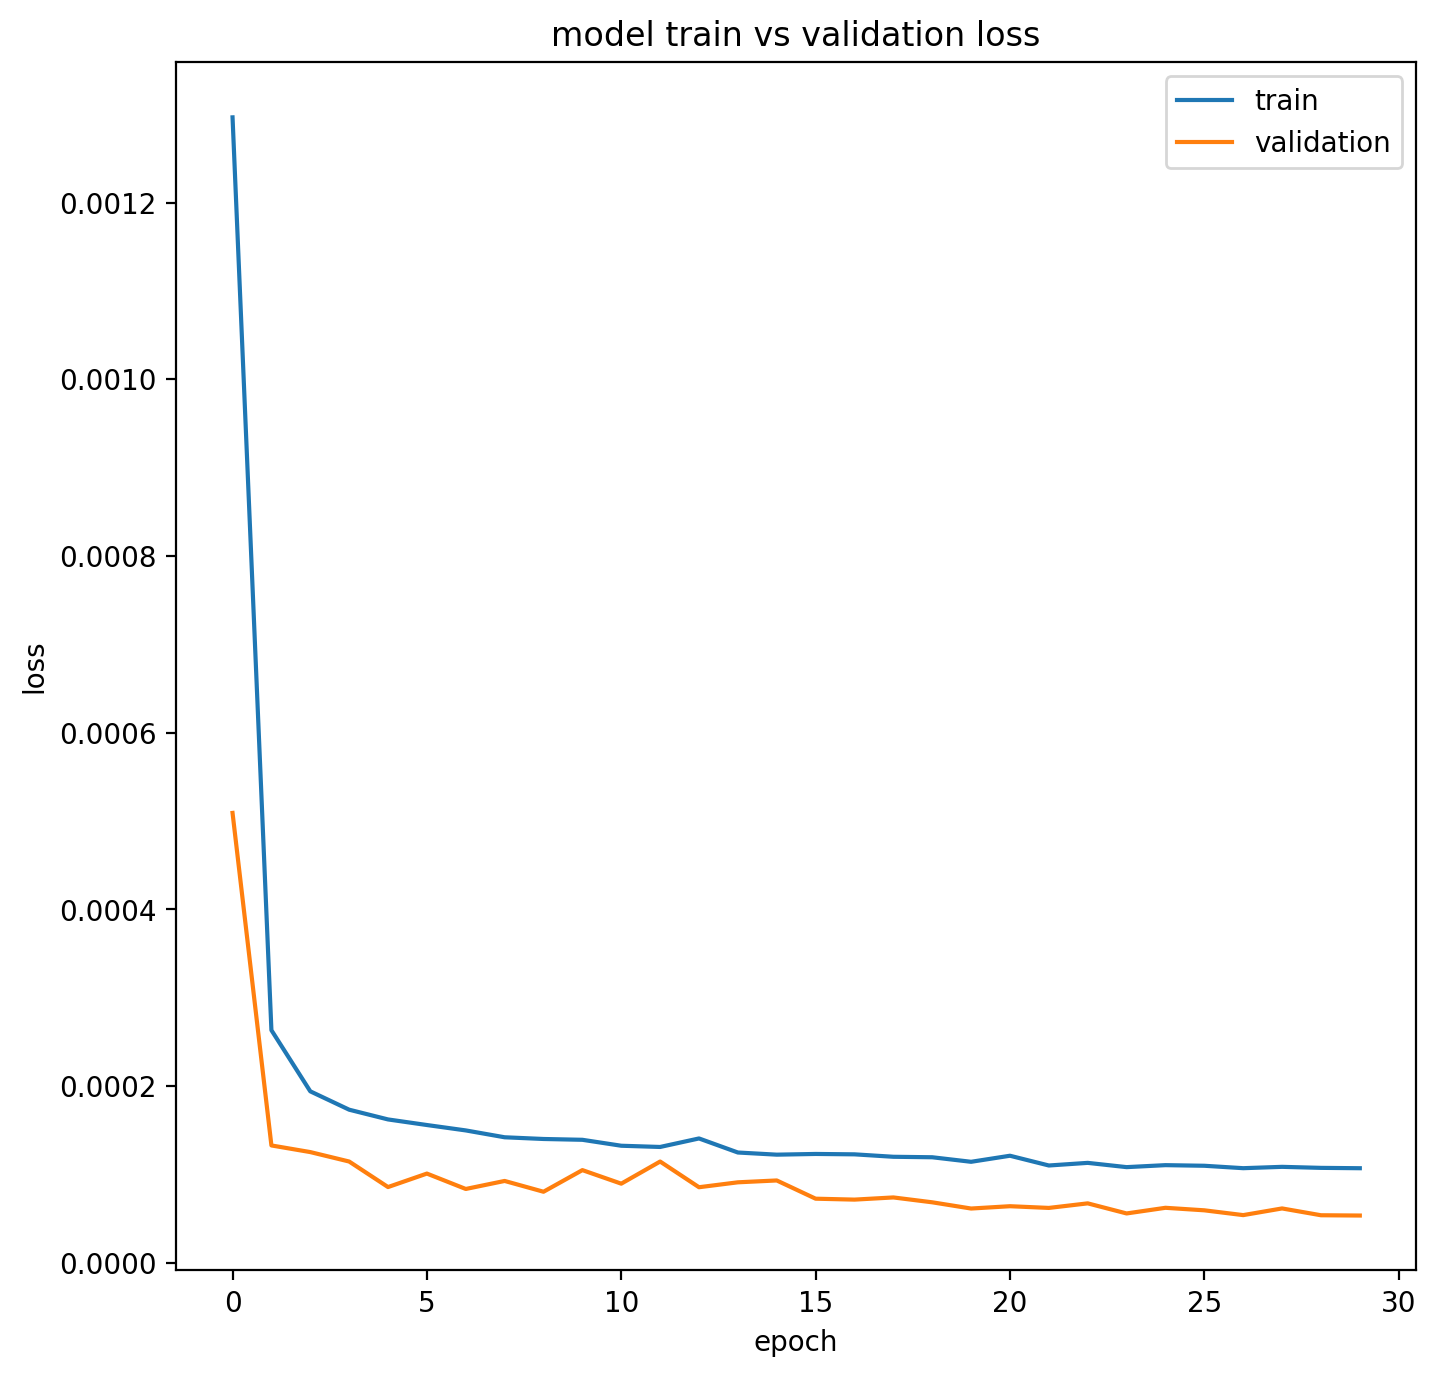

In [16]:
#最喜欢的绘图环节，通过history获取模型每步训练取得的结果loss和val_loss
plt.figure(figsize=(8,8),dpi=200)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.show()


3125/3125 [==============================] - 12s 3ms/step
0.9974674470952473


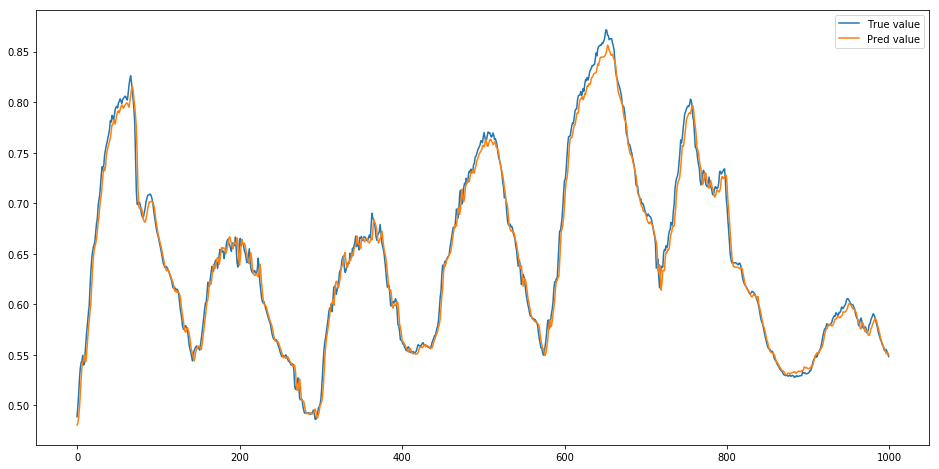

In [17]:
test_dataset.shape
#通过输入一组数据预测
test_preds=model.predict(test_dataset,verbose=1)
test_preds[:10]
#将预测后的一组数据转化为1维方便比较
test_preds=test_preds[:,0]
test_preds[:10]

test_labels.shape
#r2检验，越接近1效果越好，负数表示完全没用......
score=r2_score(test_labels,test_preds)
print(score)

#做出预测结果和实际结果的曲线对比，使用1000次结果对比
plt.figure(figsize=(16,8))
plt.plot(test_labels[:1000],label="True value")
plt.plot(test_preds[:1000],label="Pred value")
plt.legend(loc='best')
plt.show()
